# Analiza danych w języku Python - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa zespołu, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

In [1]:
NAME = "IAD11 Szefowie"
COLLABORATORS = "Michał Kosowski, Krzysztof Kowalski"

---

## Zestaw zadań 1: Elementy statystyki opisowej 1 (Notatnik 3/4)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Wczytanie danych
Wczytaj dane z przygotowanego wcześniej pliku dane.csv do tablicy `eruptions_data` w taki sposób, aby kolumna Eruption Number stanowiła indeks tablicy.

Wyświetl przygotowaną tablicę.

In [4]:
# YOUR CODE HERE
eruptions_data = pd.read_csv('eruptions_data.csv')
eruptions_data.set_index('Eruption Number', inplace=True)
eruptions_data

vei_data_1 = eruptions_data['VEI'].sort_values()
f = vei_data_1.value_counts(sort=False)
cf = f.cumsum()
rf = f/(f.sum())
rf = round(rf, 4)
crf = rf.cumsum()
vei_data_1 = pd.DataFrame({'VEI':(vei_data_1.sort_values()).unique(), 'f':f, 'cf':cf, 'rf':rf, 'crf':crf})
vei_data_1.set_index('VEI', inplace = True)

vei_data_2 = eruptions_data[eruptions_data['Eruption Category'] == 'Confirmed']
vei_data_2 = vei_data_2['VEI'].sort_values()
f = vei_data_2.value_counts(sort=False)
cf = f.cumsum()
rf = f/(f.sum())
rf = round(rf, 4)
crf = rf.cumsum()
vei_data_2 = pd.DataFrame({'VEI':(vei_data_2.sort_values()).unique(), 'f':f, 'cf':cf, 'rf':rf, 'crf':crf})
vei_data_2.set_index('VEI', inplace = True)

vei_data_3 = eruptions_data[eruptions_data['Eruption Category'] == 'Uncertain']
vei_data_3 = vei_data_3['VEI'].sort_values()
f = vei_data_3.value_counts(sort=False)
cf = f.cumsum()
rf = f/(f.sum())
rf = round(rf, 4)
crf = rf.cumsum()
vei_data_3 = pd.DataFrame({'VEI':(vei_data_3.sort_values()).unique(), 'f':f, 'cf':cf, 'rf':rf, 'crf':crf})
vei_data_3.set_index('VEI', inplace = True)
#raise NotImplementedError()

### Zadanie 4: Konstrukcja szeregów rodzielczych - bardziej skomplikowane tablice [10 pkt]

#### a) Forma tabelaryczna
Przygotuj szeregi rozdzielcze VEI w formie tablicy `vei_data` zawierającej następujące elementy:

Indeks:
- VEI - wartości VEI posortowane od najmniejszej do największej.

Kolumny: </br>
- Nagłówki 1 poziomu:
    - Eruption category - All, Confirmed Eruption, Uncertain Eruption
- Nagłówki 2 poziomu (dla każdego z nagłówków 1 poziomu ten sam zestaw kolumn):
    - f - zliczenia poszczególnych kategorii (ang. frequency, absolute frequency),
    - cf - zliczenia skumulowane poszczególnych kategorii (ang. cumulative frequency, cumulative absolute frequency),
    - rf - częstość zliczeń poszczególnych kategorii (ang. relative frequency),
    - crf - skumulowana częstość zliczeń poszczególnych kategorii (ang. cumulative relative frequency).

Wyświetl przygotowane tablicę w taki sposób, aby liczby w kolumnach f i cf oraz indeks tablicy VEI wyświetlały się bez miejsc po przecinku, a liczby z kolumn rf i crf z dokładnością do 4 miejsca po przecinku.

In [5]:
# YOUR CODE HERE
columns = pd.MultiIndex.from_product([['All eruptions', 'Confirmed Eruptions', 'Uncertain Eruptions'], ['f', 'cf', 'rf', 'crf']])
vei_data = pd.DataFrame(columns=columns)
vei_data[('All eruptions', 'f')] = vei_data_1['f']
vei_data[('All eruptions', 'cf')] = vei_data_1['cf']
vei_data[('All eruptions', 'rf')] = vei_data_1['rf']
vei_data[('All eruptions', 'crf')] = vei_data_1['crf']

vei_data[('Confirmed Eruptions', 'f')] = vei_data_2['f']
vei_data[('Confirmed Eruptions', 'cf')] = vei_data_2['cf']
vei_data[('Confirmed Eruptions', 'rf')] = vei_data_2['rf']
vei_data[('Confirmed Eruptions', 'crf')] = vei_data_2['crf']

vei_data[('Uncertain Eruptions', 'f')] = vei_data_3['f']
vei_data[('Uncertain Eruptions', 'cf')] = vei_data_3['cf']
vei_data[('Uncertain Eruptions', 'rf')] = vei_data_3['rf']
vei_data[('Uncertain Eruptions', 'crf')] = vei_data_3['crf']

formats={('All eruptions','rf'):'{:.4f}', ('All eruptions','crf'):'{:.4f}', ('Confirmed Eruptions','rf'):'{:.4f}', ('Confirmed Eruptions','crf'):'{:.4f}', ('Uncertain Eruptions','f'):'{:.0f}', ('Uncertain Eruptions','cf'):'{:.0f}', ('Uncertain Eruptions','rf'):'{:.4f}', ('Uncertain Eruptions','crf'):'{:.4f}'}
vei_data.style.format_index({'VEI': '{:.0f}'}).format(formats)
#raise NotImplementedError()

In [6]:
## Komórka testowa
# Test 1: Indeks
assert (vei_data.index.name == 'VEI') == True
assert list(vei_data.index) == [0, 1, 2, 3, 4, 5, 6, 7]
# Test 2: Kolumny
assert len(set(list(vei_data.columns.levels[0])) & set(['All eruptions', 'Confirmed Eruptions', 'Uncertain Eruptions'])) == 3
assert set(list(vei_data.columns.levels[1])) == set(['f', 'cf', 'rf', 'crf'])
# Test 3: Wartości w kolumnach f
assert list(vei_data['All eruptions']['f'].values) == [1007, 1384, 3991, 1152, 511, 180, 53, 7]
assert list(vei_data['Confirmed Eruptions']['f'].values) == [803, 1227, 3727, 1133, 510, 180, 53, 7]
assert list(vei_data['Uncertain Eruptions']['f'].values[:5]) == [204, 157, 264, 19, 1] 
assert np.all(np.isnan(vei_data['Uncertain Eruptions']['f'].values[5:]))

#### b) Forma graficzna
Zwizualizuj dane z przygotowanych tablic za pomocą wykresów słupkowych zliczeń (lewa oś wykresu) z nałożonymi na nie łamanymi częstości skumulowanej (prawa oś wykresu). Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x3). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo ustaw:
- identyczne zakresy wartości na odpowiadających sobie osiach wszystkich trzech wykresów,
- różne od domyślnych i od siebie nawzajem kolory wykresu słupkowego oraz łamanej częstości,
- kolory lewej i prawej osi oraz ich opisów identyczne z kolorem elementu wykresu, którego dotyczą,
- format wyświetlania wartości VEI bez miejsc po przecinku.

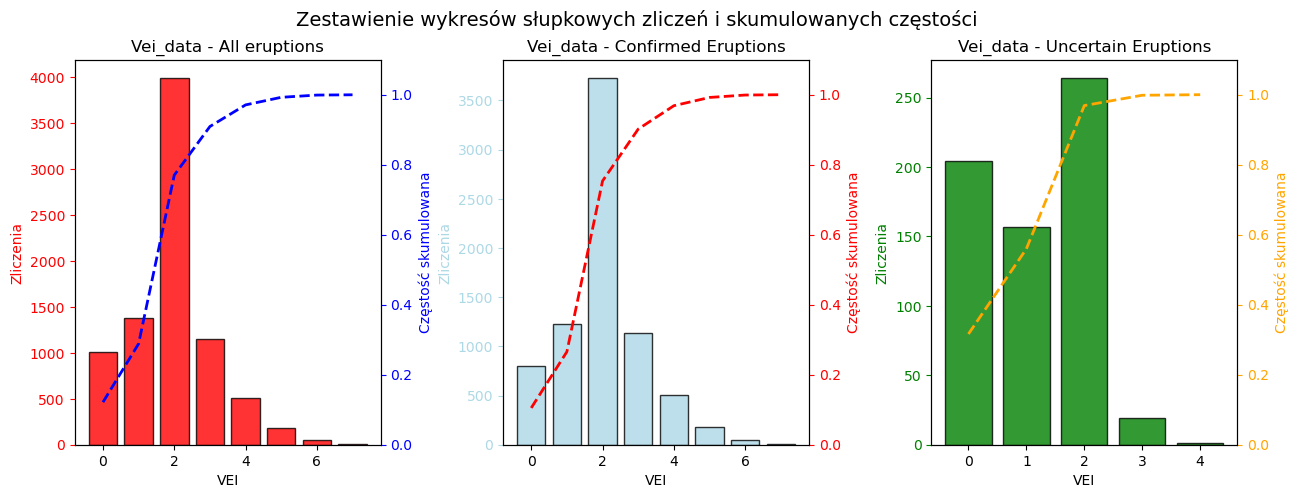

In [7]:
# YOUR CODE HERE
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(vei_data.index, vei_data['All eruptions']['f'], color='red', edgecolor="black", alpha=0.8)
axes[0].set_title("Vei_data - All eruptions", fontsize=12)
axes[0].set_xlabel("VEI", fontsize=10)
axes[0].set_ylabel("Zliczenia", fontsize=10, color = 'red')
axes[0].tick_params(axis="y", color = 'red', labelcolor = 'red')

axes_0 = axes[0].twinx()
axes_0.plot(vei_data.index, vei_data['All eruptions']['crf'], color='blue', linestyle="--", linewidth=2)
axes_0.tick_params(axis="y", color = 'blue', labelcolor = 'blue')
axes_0.set_ylim(0, 1.1)
axes_0.set_ylabel("Częstość skumulowana", fontsize=10, color = 'blue')

axes[1].bar(vei_data.index, vei_data['Confirmed Eruptions']['f'], color='lightblue', edgecolor="black", alpha=0.8)
axes[1].set_title("Vei_data - Confirmed Eruptions", fontsize=12)
axes[1].set_xlabel("VEI", fontsize=10)
axes[1].set_ylabel("Zliczenia", fontsize=10, color = 'lightblue')
axes[1].tick_params(axis="y", color = 'lightblue', labelcolor = 'lightblue')

axes_1 = axes[1].twinx()
axes_1.plot(vei_data.index, vei_data['Confirmed Eruptions']['crf'], color='red', linestyle="--", linewidth=2)
axes_1.tick_params(axis="y", color = 'red', labelcolor = 'red')
axes_1.set_ylim(0, 1.1)
axes_1.set_ylabel("Częstość skumulowana", fontsize=10, color = 'red')

axes[2].bar(vei_data.index, vei_data['Uncertain Eruptions']['f'], color='green', edgecolor="black", alpha=0.8)
axes[2].set_title("Vei_data - Uncertain Eruptions", fontsize=12)
axes[2].set_xlabel("VEI", fontsize=10)
axes[2].set_ylabel("Zliczenia", fontsize=10, color = 'green')
axes[2].tick_params(axis="y", color = 'green', labelcolor = 'green')

axes_2 = axes[2].twinx()
axes_2.plot(vei_data.index, vei_data['Uncertain Eruptions']['crf'], color='orange', linestyle="--", linewidth=2)
axes_2.tick_params(axis="y", color = 'orange', labelcolor='orange')
axes_2.set_ylim(0, 1.1)
axes_2.set_ylabel("Częstość skumulowana", color='orange')

fig.suptitle("Zestawienie wykresów słupkowych zliczeń i skumulowanych częstości", fontsize=14)
plt.subplots_adjust(wspace=0.4)

fig.savefig('z1zad4.png')
#raise NotImplementedError()

### Zadanie 5: Rodzaje metod wykrywania erupcji [10 pkt]

Przygotuj tablice `evidence_data` zawiarającą informacje o tym ile erupcji o poszczególnych wartościach VEI zostało potwierdzonych przy użyciu poszczególnych metod weryfikacji.
Tablica powinna zawierać następujące elementy:

Indeks:
- Nagłówki 1 poziomu
    - kategoria dowodów
- Nagłówki 2 poziomu:
    - metoda, która dostarczyła dowodów

Kolumny: </br>
- VEI - wartości VEI posortowane od najmniejszej do największej oraz kolumna "All", w której znajdują się dane dotyczące wszystkich erupcji, bez podziału na VEI.

Wyświetl przygotowane tablicę w taki sposób, aby zawarte w tablicy liczby (w tym wartości VEI w nagłówkach kolumn) wyświetlały się bez miejsc po przecinku.

In [8]:
evidence_data = pd.crosstab([eruptions_data['Evidence Type'], eruptions_data['Evidence Method']], eruptions_data['VEI'])
evidence_data['All'] = evidence_data.sum(axis=1)
index = list(map(list, evidence_data.index))
index[-1][-1] = 'Unspecified'
index = pd.MultiIndex.from_tuples(index, names=["first", "second"])
evidence_data.index = index
evidence_data.columns
evidence_data.style.format_index(precision=0, axis = 1)
#dfi.export(evidence_data, 'z1zad5.png')

In [9]:
# Test 1 Kształt tablicy
assert evidence_data.shape == (22, 9)
# # Test 2 Kolumny
assert len(set(list(evidence_data.columns)) & set([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 'All'])) == 9
# Test 3 Indeks
assert (eruptions_data.index.name == 'Eruption Number') == True
assert len(set(list(evidence_data.index)) & set([('Observations', 'Reported'), ('Observations', 'Satellite (infrared)'), ('Observations', 'Satellite (visual)'),
                                ('Observations', 'Seismicity'), ('Observations', 'Hydrophonic'), ('Observations', 'Photo / Video'), ('Observations', 'Aviation'),
                                ('Uncertain', 'Unspecified'), ('Isotopic', 'Uranium-series'), ('Isotopic', '14C (calibrated)'), ('Isotopic', '14C (uncalibrated)'),
                                ('Isotopic', 'Cosmic Ray Exposure'), ('Isotopic', 'Ar/Ar'), ('Isotopic', 'K/Ar'), ('Correlation', 'Magnetism'), ('Correlation', 'Tephrochronology'),
                                ('Correlation', 'Anthropology'), ('Sidereal', 'Varve Count'), ('Sidereal', 'Dendrochronology'), ('Sidereal', 'Ice Core'), ('Radiogenic', 'Fission track'),
                                ('Radiogenic', 'Thermoluminescence')])) == 22
# Test 4 Kilka losowo wybranych wartości w tablicy
assert evidence_data.loc[('Observations', 'Reported'), 0] == 376
assert evidence_data.loc[('Uncertain', 'Unspecified'), 3] == 22
assert evidence_data.loc[('Sidereal', 'Ice Core'), 7] == 2
assert evidence_data.loc[('Isotopic', '14C (uncalibrated)'), 5] == 41
assert evidence_data.loc[('Correlation', 'Anthropology'), 6] == 0

### Zadanie 6: Wizualizacja rozkładu zarejestrowanych erupcji w czasie [2 pkt]

Korzystając z funkcji `seaborn.stripplot()` zwizualizuj jak rozkładały się w czasie wystąpienia zarejestrowanych erupcji. Do rozróżnienia erupcji w czasie wykorzystaj rok, w którym nastąpił ich początek.

Wyniki zestaw na pojedynczej figurze (siatka wykresów 2x1). Na górnym wykresie przedstaw dane rozróżnione tylko po kątem VEI, a na dolnym wykresie przedstaw dane rozróżnione zarówno po VEI jak i rodzaju dowodu ich wystąpienia (Evidence Type). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- dodaj legendę do dolnego wykresu w taki sposób, aby nie zasłaniała znajdujących nię na nim danych,
- ustaw format wyświetlania wartości VEI bez miejsc po przecinku.

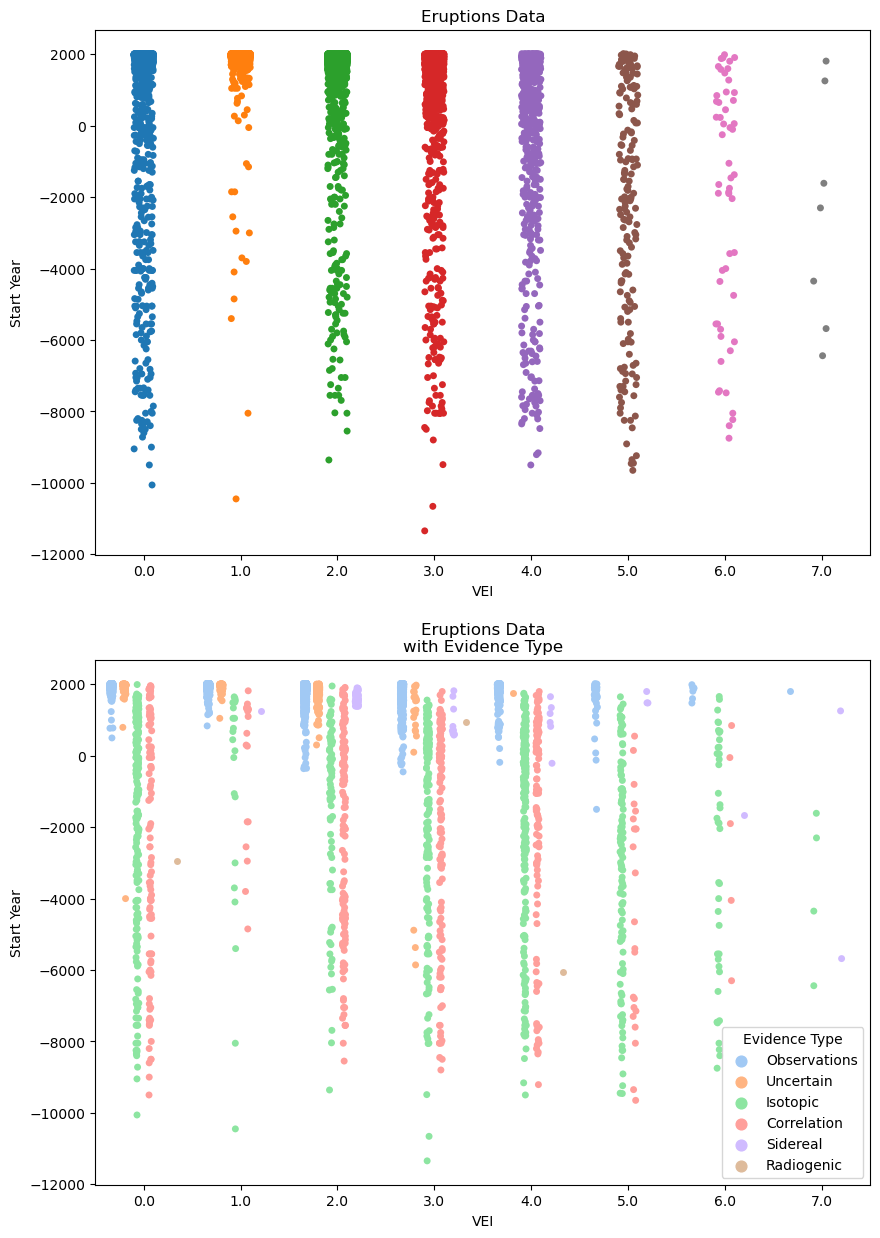

In [11]:
# YOUR CODE HERE
fig, axes = plt.subplots(2, 1, figsize=(10, 15))
fig.set_facecolor('white')
axes[0].set_facecolor('white')
axes[0].set_title('Eruptions Data')
sns.stripplot(data=eruptions_data, x='VEI', y='Start Year', ax=axes[0])

axes[1].set_facecolor('white')
axes[1].set_title('Eruptions Data\nwith Evidence Type')
sns.stripplot(data=eruptions_data, x='VEI', y='Start Year', hue='Evidence Type', ax=axes[1], palette='pastel', dodge=True)

fig.savefig('z1zad6.png')
#raise NotImplementedError()